In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

In [31]:
def prepro(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    mask = np.zeros((gray.shape),np.uint8)
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

    close = cv2.morphologyEx(gray,cv2.MORPH_CLOSE,kernel1)
    div = np.float32(gray)/(close)
    res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
    res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
    plt.imshow(res2)
    

In [32]:
ref = cv2.imread("S5.jpeg")

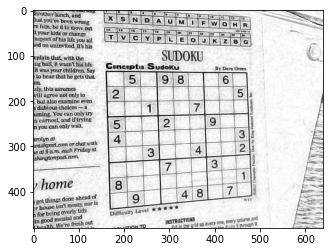

In [33]:
prepro(ref)

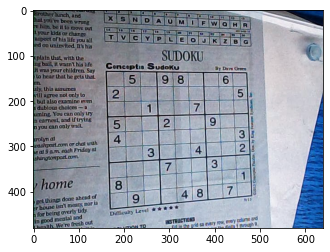

In [7]:
plt.imshow(ref)